# Análise de Previsão de Custos AWS

Este notebook realiza uma análise de previsão de custos na Amazon Web Services (AWS) usando regressão linear.

## 1. Importar Bibliotecas

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## 2. Preparar Dados de Custos

In [3]:
# Simulando meses (1 a 12) e custos em Dólares
meses = np.array(range(1, 13)).reshape(-1, 1)
custos = np.array([1200, 1250, 1300, 1280, 1350, 1400, 1450, 1500, 1600, 1550, 1650, 1700])

# Criar um DataFrame para visualização
df = pd.DataFrame({
    'Mês': meses.flatten(),
    'Custo ($)': custos
})

print("Dados de Custos Mensais:")
print(df)

Dados de Custos Mensais:
    Mês  Custo ($)
0     1       1200
1     2       1250
2     3       1300
3     4       1280
4     5       1350
5     6       1400
6     7       1450
7     8       1500
8     9       1600
9    10       1550
10   11       1650
11   12       1700


## 3. Treinamento do Modelo

In [4]:
# Modelo de Regressão Linear para prever tendência
modelo = LinearRegression()
modelo.fit(meses, custos)

print(f"Coeficiente (taxa de crescimento mensal): ${modelo.coef_[0]:.2f}")
print(f"Intercepto: ${modelo.intercept_:.2f}")

Coeficiente (taxa de crescimento mensal): $45.28
Intercepto: $1141.52


## 4. Previsão para o Próximo Mês

In [5]:
# Previsão para o mês 13 (Janeiro do ano seguinte)
proximo_mes = np.array([[13]])
previsao = modelo.predict(proximo_mes)

print(f"A previsão de custo para o próximo mês na AWS é de: ${previsao[0]:.2f}")

A previsão de custo para o próximo mês na AWS é de: $1730.15


## 5. Visualização dos Dados e Previsão

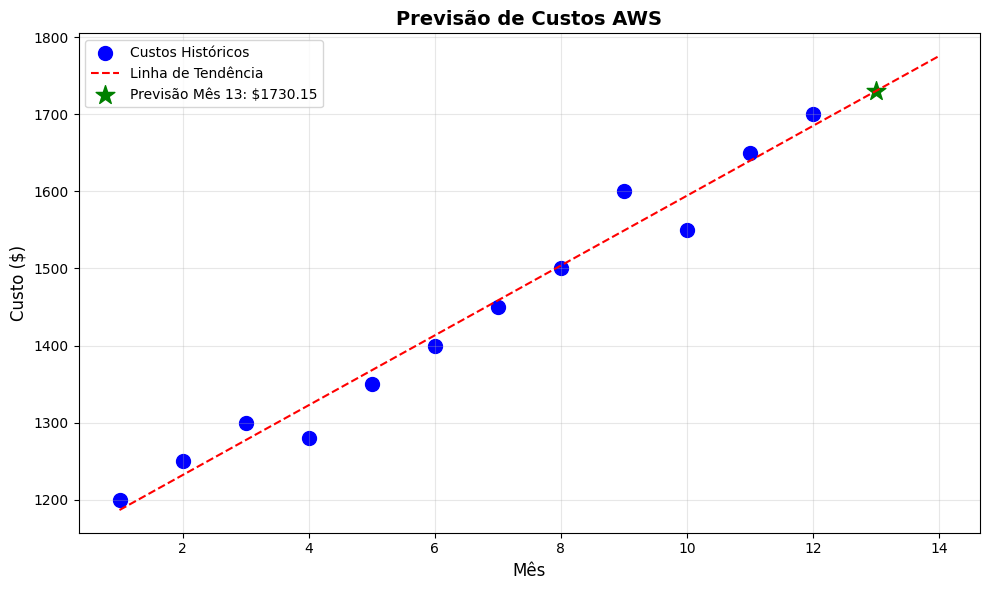

In [6]:
# Criar gráfico
plt.figure(figsize=(10, 6))

# Dados históricos
plt.scatter(meses, custos, color='blue', label='Custos Históricos', s=100)

# Linha de regressão
linha_x = np.array(range(1, 15)).reshape(-1, 1)
linha_y = modelo.predict(linha_x)
plt.plot(linha_x, linha_y, color='red', linestyle='--', label='Linha de Tendência')

# Previsão
plt.scatter(13, previsao[0], color='green', s=200, marker='*', label=f'Previsão Mês 13: ${previsao[0]:.2f}')

plt.xlabel('Mês', fontsize=12)
plt.ylabel('Custo ($)', fontsize=12)
plt.title('Previsão de Custos AWS', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Previsões para os Próximos Meses

In [7]:
# Previsões para os próximos 6 meses
proximos_meses = np.array([[13], [14], [15], [16], [17], [18]])
previsoes = modelo.predict(proximos_meses)

previsoes_df = pd.DataFrame({
    'Mês': [13, 14, 15, 16, 17, 18],
    'Previsão de Custo ($)': previsoes.round(2)
})

print("\nPrevisões para os próximos 6 meses:")
print(previsoes_df)


Previsões para os próximos 6 meses:
   Mês  Previsão de Custo ($)
0   13                1730.15
1   14                1775.43
2   15                1820.71
3   16                1865.99
4   17                1911.27
5   18                1956.55
